# Wrangle and Analyze Data - WeRateDogs
by *Dilip Rajkumar*

In today's world of Data analytics, data wrangling has become an indispensable skill since so much of the world's data isn't clean. In this project we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. The dataset that we will be wrangling, analyzing and visualizing is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs).

## Gather
 The first step in the Data Wrangling process is acquiring or _gathering_ the data. Without Gathering we would have no data.
 We will gather data from the following sources as per the instructions of the Udacity Project Rubric.
- The WeRateDogs Twitter archive ( [twitter_archive_enhanced.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)). This csv file file was provided to us and we read it manually. 
- The tweet image predictions ([image_predictions.tsv](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)) file, classifies the breed of the dog present in each tweet's image using a neural network. This file  hosted on Udacity's servers, should be downloaded programmatically using the `Requests` library. 
- Using the tweet IDs in the WeRateDogs Twitter archive, we will query the Twitter API for each tweet's JSON data using Python's `Tweepy` library and store each tweet's entire set of JSON data in a file called `tweet_json.txt` file. Each tweet's JSON data should be written to its own line. Then we will read this .txt file, line by line into a pandas DataFrame with tweet ID, retweet count, and favorite (i.e. "like") count (at minimum) and any additional data we will find interesting.

In [1]:
# Import the libraries that we will need in this project
import pandas as pd
import numpy as np
import datetime as dt
import requests
import tweepy
import json
import re
import time

In [2]:
# Read the twitter-archive-enhanced.csv file and store it as dataframe in archive
twitter_archive = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv')
twitter_archive.tail(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [3]:
# Using Requests library to download and store  a tsv file
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

# Read the stored tsv file
imagepredictions = pd.read_csv('image_predictions.tsv', sep = '\t', encoding = 'utf-8')
imagepredictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [170]:
# Authenticate Tweepy API with Access Keys and Tokens
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [5]:
# Storing data from API Query
working_IDs =[]
error_IDs = []
start = time.time()
with open('tweet_json.txt','w',encoding='utf8') as file:    
    for tweet_id in twitter_archive['tweet_id']: # For loop which will add each available tweet to a new line of tweet_json.txt
        try:
            tweet_details = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet_details._json, file)
            file.write('\n')
            working_IDs.append(tweet_id)
        except Exception as e:
            print("Failed Tweet ID:",tweet_id,"- Error Message:",e)
            error_IDs.append(tweet_id)
    
# Calculate the time of excution
end = time.time()
print("Total RunTime:",end - start,"secs")

Failed Tweet ID: 888202515573088257 - Error Message: [{'code': 144, 'message': 'No status found with that ID.'}]
Failed Tweet ID: 873697596434513921 - Error Message: [{'code': 144, 'message': 'No status found with that ID.'}]
Failed Tweet ID: 869988702071779329 - Error Message: [{'code': 144, 'message': 'No status found with that ID.'}]
Failed Tweet ID: 866816280283807744 - Error Message: [{'code': 144, 'message': 'No status found with that ID.'}]
Failed Tweet ID: 861769973181624320 - Error Message: [{'code': 144, 'message': 'No status found with that ID.'}]
Failed Tweet ID: 845459076796616705 - Error Message: [{'code': 144, 'message': 'No status found with that ID.'}]
Failed Tweet ID: 842892208864923648 - Error Message: [{'code': 144, 'message': 'No status found with that ID.'}]
Failed Tweet ID: 837012587749474308 - Error Message: [{'code': 144, 'message': 'No status found with that ID.'}]
Failed Tweet ID: 827228250799742977 - Error Message: [{'code': 144, 'message': 'No status found 

In [6]:
print("No. of Working Tweet IDs:", len(working_IDs))
print("No. of Non Working Tweet IDs:", len(error_IDs))

No. of Working Tweet IDs: 2345
No. of Non Working Tweet IDs: 11


From the above results:
- We reached the rate limit of the tweepy API call twice. Since we set ```wait_on_rate_limit = True``` the API automatically waits for rate limits to replenish and `wait_on_rate_limit_notify` prints a notification when Tweepy is waiting before making the next API call.
- We could get data for 2345 _tweet ids_ correctly but 11 _tweet ids_ did not return any data from the API query.
- The total runtime to complete this Twitter API query was about 2180 seconds (~ 36 min)

In [4]:
# Reading JSON content as pandas dataframe
tweet_data_raw = pd.read_json('data/tweet_json.txt', lines = True, encoding='utf-8')
tweet_data_raw.head(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38948,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8632,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33346,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6341,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [5]:
tweet_data = tweet_data_raw[['id','created_at','favorite_count','retweet_count']].copy()
tweet_data.head()

,id,created_at,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,38948,8632
1,892177421306343426,2017-08-01 00:17:27,33346,6341
2,891815181378084864,2017-07-31 00:18:03,25120,4208
3,891689557279858688,2017-07-30 15:58:51,42289,8755
4,891327558926688256,2017-07-29 16:00:24,40455,9512


### Gather Data - Summary
- The following tasks have been accomplished thus far in the gathering process:
    - Getting data from an existing file (`twitter-archive-enhanced.csv`) - *Reading from csv file using pandas*
    - Downloading a file from the internet (`image-predictions.tsv`) - *Downloading file programatically using* `requests`
    - Querying an API (`tweet_json.txt`) - *Get JSON object of all the tweet_ids using Tweepy*
    
- Importing that data into our programming environment (Jupyter Notebook)



## Assess
We will now assess the gathered data visually and programmatically for quality and tidiness issues. We will also document the issues identified.

In [173]:
# Disable warnings
import warnings
warnings.simplefilter('ignore')

In [174]:
# Set column width to infinite so entire content of 'text' column is displayed
pd.set_option('display.max_colwidth', -1)

In [175]:
# Print entire twitter archive dataframe to assess it visually
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [176]:
# View info of twitter_archive DataFrame
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Some description of the variables in the dataset, you can find more in this [link](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object)
- **tweet_id**: The integer representation of the unique identifier for this Tweet.
- **in_reply_to_status_id**: If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
- **in_reply_to_user_id_str**:  If the represented Tweet is a reply, this field will contain the string representation of the original Tweet’s author ID. This will not necessarily always be the user directly mentioned in the Tweet

In [6]:
# View descriptive statistics of twitter_archive DataFrame
twitter_archive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [178]:
# Check for Duplicate Tweet IDs
twitter_archive[twitter_archive.duplicated('tweet_id')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [15]:
# List of tweet ids which were unavailable in API
print("Non Working Tweet IDs: \n", error_IDs)
twitter_archive.loc[twitter_archive['tweet_id'].isin(error_IDs),]

Non Working Tweet IDs: 
 [888202515573088257, 873697596434513921, 869988702071779329, 866816280283807744, 861769973181624320, 845459076796616705, 842892208864923648, 837012587749474308, 827228250799742977, 802247111496568832, 775096608509886464]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,"https://twitter.com/dog_rates/status/868880397819494401/photo/1,https://twitter.com/dog_rates/status/868880397819494401/photo/1",14,10,Walter,None,None,None,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
132,866816280283807744,NaN,NaN,2017-05-23 00:41:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7T…",8.664507e+17,4.196984e+09,2017-05-22 00:28:40 +0000,"https://twitter.com/dog_rates/status/866450705531457537/photo/1,https://twitter.com/dog_rates/status/866450705531457537/photo/1",13,10,Jamesy,None,None,pupper,None
155,861769973181624320,NaN,NaN,2017-05-09 02:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: ""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,"https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1",13,10,None,None,None,None,None
247,845459076796616705,NaN,NaN,2017-03-25 02:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Here's a heartwarming scene of a single father raising his two pups. Downright awe-inspiring af. 12/10 for everyone https://…,7.562885e+17,4.196984e+09,2016-07-22 00:43:32 +0000,"https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1",12,10,None,None,None,None,None
260,842892208864923648,NaN,NaN,2017-03-18 00:15:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,8.071068e+17,4.196984e+09,2016-12-09 06:17:20 +0000,"https://twitter.com/dog_rates/status/807106840509214720/video/1,https://twitter.com/dog_rates/status/807106840509214720/video/1",13,10,Stephan,None,None,None,None

All the tweets which could not be queried from tweepy API are basically retweets.

In [16]:
# Retweets
# pd.options.display.float_format = '{:.0f}'.format
twitter_archive[['tweet_id','retweeted_status_id','retweeted_status_user_id']][~pd.isnull(twitter_archive.retweeted_status_id)]

,tweet_id,retweeted_status_id,retweeted_status_user_id
19,888202515573088257,8.874740e+17,4.196984e+09
32,886054160059072513,8.860537e+17,1.960740e+07
36,885311592912609280,8.305833e+17,4.196984e+09
68,879130579576475649,8.780576e+17,4.196984e+09
73,878404777348136964,8.782815e+17,4.196984e+09
74,878316110768087041,6.690004e+17,4.196984e+09
78,877611172832227328,8.768508e+17,5.128045e+08
91,874434818259525634,8.663350e+17,4.196984e+09
95,873697596434513921,8.688804e+17,4.196984e+09
97,873337748698140672,8.732138e+17,4.196984e+09


181 Tweets are Retweets

In [7]:
# Tweets with no images (NULL expanded_urls)
twitter_archive[['tweet_id','expanded_urls']][pd.isnull(twitter_archive.expanded_urls)].head(20)

,tweet_id,expanded_urls
30,886267009285017600,NaN
55,881633300179243008,NaN
64,879674319642796034,NaN
113,870726314365509632,NaN
148,863427515083354112,NaN
179,857214891891077121,NaN
185,856330835276025856,NaN
186,856288084350160898,NaN
188,855862651834028034,NaN
189,855860136149123072,NaN


In [18]:
print ("No. of Tweets with no Images: ", sum(twitter_archive['expanded_urls'].isnull()))

No. of Tweets with no Images:  59


In [19]:
# Sort values of 'name' column alphabetically - lowercase values appear at the bottom
twitter_archive.name.sort_values()

1035    Abby        
1021    Abby        
938     Ace         
1933    Acro        
1327    Adele       
1934    Aiden       
77      Aja         
480     Akumi       
820     Al          
875     Albert      
1954    Albert      
144     Albus       
412     Albus       
1115    Aldrick     
2046    Alejandro   
374     Alexander   
1189    Alexanderson
486     Alf         
2238    Alfie       
661     Alfie       
367     Alfie       
1616    Alfie       
858     Alfie       
51      Alfy        
201     Alice       
1701    Alice       
1495    Amber       
1334    Ambrose     
2078    Amy         
2195    Amélie      
         ...        
852     my          
988     not         
335     not         
1747    officially  
1206    old         
993     one         
1936    one         
924     one         
369     one         
2326    quite       
169     quite       
118     quite       
193     quite       
2030    space       
22      such        
2345    the         
2346    the  

In [21]:
# Unusual names
twitter_archive[['tweet_id','name','text']][twitter_archive['name'].apply(len) < 3]

,tweet_id,name,text
56,881536004380872706,a,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
393,825876512159186944,Mo,This is Mo. No one will push him around in the grocery cart. He's quite pupset about it. 11/10 I volunteer https://t.co/feNwTq12S5
446,819015337530290176,Bo,RT @dog_rates: This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1
449,819004803107983360,Bo,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1
553,804026241225523202,Bo,This is Bo. He's going to make me cry. 13/10 please get off the bus for him Carly https://t.co/U7FvBZo6Bq
583,800188575492947969,Bo,RT @dog_rates: This is Bo. He's a Benedoop Cumbersnatch. Seems frustrated with own feet. Portable as hell. 11/10 very solid pupper https://…
649,792913359805018113,a,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
679,789137962068021249,Bo,This is Bo. He's a West Congolese Bugaboop Snuggle. Rather exotic. Master of the head tilt. 12/10 would pay to pet https://t.co/2jwxxtNzoN
686,788070120937619456,Bo,RT @dog_rates: This is Bo and Ty. Bo eats paper and Ty felt left out. 11/10 for both https://t.co/1acHQS8rvK
759,778396591732486144,an,RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR


In [22]:
# Unusual Dog names - 2
twitter_archive[['tweet_id','name','text']][(twitter_archive.name == "a") | (twitter_archive.name == "the") | (twitter_archive.name == "an")|
                                    (twitter_archive.name == "such")| (twitter_archive.name == "quite")| (twitter_archive.name == "this") |
                                    (twitter_archive.name == "one") | (twitter_archive.name == "old") | (twitter_archive.name == "my")|
                                    (twitter_archive.name == "his") | (twitter_archive.name == "by") | (twitter_archive.name == "mad")|
                                    (twitter_archive.name == "not")| (twitter_archive.name == "officially") | (twitter_archive.name == "very") |
                                    (twitter_archive.name == "just") | (twitter_archive.name == "unacceptable")]

,tweet_id,name,text
22,887517139158093824,such,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
56,881536004380872706,a,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
118,869988702071779329,quite,RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…
169,859196978902773760,quite,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
193,855459453768019968,quite,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x"
335,832645525019123713,not,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7
369,828650029636317184,one,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK"
649,792913359805018113,a,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
682,788552643979468800,mad,RT @dog_rates: Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX
759,778396591732486144,an,RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR


Based on the above assessments it appears all our tweets with incorrect names are in lower case and many of these tweets have the proper names in the text field. The text fields containing valid names for these tweets with incorrect names sometimes have the string `is named` or `named` in them , from which the correct name can be extracted.

In [23]:
# Text fields that contain the string 'named'
twitter_archive[['tweet_id','name','text']].loc[(twitter_archive['name'].str.islower()) & (twitter_archive['text'].str.contains('named'))]

,tweet_id,name,text
1853,675706639471788032,a,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI
1955,673636718965334016,a,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3
2034,671743150407421952,a,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7
2066,671147085991960577,a,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr
2116,670427002554466305,a,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo
2125,670361874861563904,a,This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj
2128,670303360680108032,a,This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN
2146,669923323644657664,a,This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX
2161,669564461267722241,a,This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl
2191,668955713004314625,a,This is a Slovakian Helter Skelter Feta named Leroi. Likes to skip on roofs. Good traction. Much balance. 10/10 wow! https://t.co/Dmy2mY2Qj5


In [24]:
# Text fields that contain the string 'name is'
twitter_archive[['tweet_id','name','text']].loc[(twitter_archive['name'].str.islower()) & (twitter_archive['text'].str.contains('name is'))]

,tweet_id,name,text
852,765395769549590528,my,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB
2287,667177989038297088,a,This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW


In [25]:
# Tweets with no valid names in the text fields
twitter_archive[['tweet_id','name','text']].loc[(twitter_archive['name'].str.islower()) & ~(twitter_archive['text'].str.contains('name is')) & ~(twitter_archive['text'].str.contains('named')) ]

,tweet_id,name,text
22,887517139158093824,such,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
56,881536004380872706,a,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
118,869988702071779329,quite,RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…
169,859196978902773760,quite,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
193,855459453768019968,quite,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x"
335,832645525019123713,not,There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7
369,828650029636317184,one,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK"
542,806219024703037440,incredibly,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi
649,792913359805018113,a,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
682,788552643979468800,mad,RT @dog_rates: Say hello to mad pupper. You know what you did. 13/10 would pet until no longer furustrated https://t.co/u1ulQ5heLX


In [26]:
# Tweets with Dog Names set to None
twitter_archive[['tweet_id','name','text']][(twitter_archive.name == "None")]

,tweet_id,name,text
5,891087950875897856,None,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
7,890729181411237888,None,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
12,889665388333682689,None,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
24,887343217045368832,None,You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
25,887101392804085760,None,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
30,886267009285017600,None,@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution
32,886054160059072513,None,RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo
35,885518971528720385,None,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk
37,885167619883638784,None,Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf
41,884441805382717440,None,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC"


In [27]:
twitter_archive[['tweet_id','name','text']][twitter_archive.text.str.contains('Al Cabone') | twitter_archive.text.str.contains('Malley')]

,tweet_id,name,text
775,776201521193218049,O,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC
820,770414278348247044,Al,Meet Al Cabone. He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 11/10 pet w extreme caution https://t.co/OUwWbEKOUV


In [28]:
# Check ratings that don't follow pattern
twitter_archive[['tweet_id','rating_numerator','rating_denominator','text']][twitter_archive['rating_denominator'] < 10]

,tweet_id,rating_numerator,rating_denominator,text
313,835246439529840640,960,0,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"
516,810984652412424192,24,7,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
2335,666287406224695296,1,2,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv


In [29]:
# Check ratings that don't follow pattern
twitter_archive[['tweet_id','rating_numerator','rating_denominator','text']][twitter_archive['rating_numerator'] > 20].sort_values(by = "rating_numerator")

,tweet_id,rating_numerator,rating_denominator,text
516,810984652412424192,24,7,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
1712,680494726643068929,26,10,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
763,778027034220126208,27,10,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
1433,697463031882764288,44,40,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ
1274,709198395643068416,45,50,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK"
1202,716439118184652801,50,50,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1351,704054845121142784,60,50,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa
340,832215909146226688,75,10,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…"
695,786709082849828864,75,10,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"
1254,710658690886586372,80,80,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12


In [30]:
# View rows in twitter_archive which contain '&amp;' instead of '&' in 'text' column
twitter_archive[['tweet_id','name','text']][twitter_archive.text.str.contains('&amp;')]

,tweet_id,name,text
262,842765311967449089,Indie,Meet Indie. She's not a fan of baths but she's definitely a fan of hide &amp; seek. 12/10 click the link to help Indie\n\nhttps://t.co/fvGkIuAlFK https://t.co/kiCFtmJd7l
273,840728873075638272,Pipsy,RT @dog_rates: This is Pipsy. He is a fluffball. Enjoys traveling the sea &amp; getting tangled in leash. 12/10 I would kill for Pipsy https://…
320,834458053273591808,Chester,"Meet Chester (bottom) &amp; Harold (top). They are different dogs not only in appearance, but in personality as well. Both 12/10 symbiotic af https://t.co/8ZOZS2FSJe"
461,817536400337801217,Eugene,"Say hello to Eugene &amp; Patti Melt. No matter how dysfunctional they get, they will never top their owners. Both 12/10 would pet at same time https://t.co/jQUdvtdYMu"
485,814578408554463233,Beau,RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…
516,810984652412424192,Sam,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
799,772826264096874500,Roosevelt,Meet Roosevelt. He's preparing for takeoff. Make sure tray tables are in their full pupright &amp; licked position\n11/10 https://t.co/7CQkn3gHOQ
889,759793422261743616,Maggie,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll"
898,758854675097526272,Lilli,"This is Lilli Bee &amp; Honey Bear. Unfortunately, they were both born with no eyes. So heckin sad. Both 11/10 https://t.co/4UrfOZhztW"
976,750026558547456000,Jax,Meet Jax &amp; Jil. Jil is yelling the pledge of allegiance. If u cant take the freedom get out the kitchen Jax. 10/10s https://t.co/jrg29NDNhI


In [31]:
# Print entire image_predictions dataframe to assess it visually
imagepredictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [32]:
# View info of image_predictions dataframe
imagepredictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
# View descriptive statistics of image_predictions dataframe
imagepredictions[['p1_conf','p2_conf','p3_conf']].describe()

,p1_conf,p2_conf,p3_conf
count,2075.000000,2.075000e+03,2.075000e+03
mean,0.594548,1.345886e-01,6.032417e-02
std,0.271174,1.006657e-01,5.090593e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.364412,5.388625e-02,1.622240e-02
50%,0.588230,1.181810e-01,4.944380e-02
75%,0.843855,1.955655e-01,9.180755e-02
max,1.000000,4.880140e-01,2.734190e-01


In [34]:
# Check for Duplicate tweet IDs
imagepredictions[imagepredictions.duplicated('tweet_id')]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [35]:
# Check for Duplicate jpg URLs
imagepredictions[imagepredictions.duplicated('jpg_url')]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [36]:
# Check random Duplicate URL
imagepredictions[imagepredictions['jpg_url'] == 'https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
800,691416866452082688,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True
1624,803692223237865472,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True


In [37]:
# Check for Duplicate Tweet IDs
imagepredictions[imagepredictions.duplicated('tweet_id')]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [38]:
# Expand user dictionary  to random row in the Raw tweet data from API Query
tweet_data_raw['user'][2342]

{'contributors_enabled': False,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'default_profile': False,
 'default_profile_image': False,
 'description': 'Your Only Source for Professional Dog Ratings STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs | MOBILE APP: @GoodDogsGame Business: dogratingtwitter@gmail.com',
 'entities': {'description': {'urls': []},
  'url': {'urls': [{'display_url': 'weratedogs.com',
     'expanded_url': 'http://weratedogs.com',
     'indices': [0, 23],
     'url': 'https://t.co/N7sNNHAEXS'}]}},
 'favourites_count': 132927,
 'follow_request_sent': False,
 'followers_count': 6648581,
 'following': False,
 'friends_count': 103,
 'geo_enabled': True,
 'has_extended_profile': True,
 'id': 4196983835,
 'id_str': '4196983835',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': 'en',
 'listed_count': 4185,
 'location': '𝓶𝓮𝓻𝓬𝓱 ↴      DM YOUR DOGS',
 'name': 'WeRateDogs™',
 'notifications': False,
 'profile_background_color': '000000',
 'profile_bac

In [39]:
# Print entire tweet_data dataframe to assess it visually
tweet_data

,id,created_at,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,38948,8632
1,892177421306343426,2017-08-01 00:17:27,33346,6341
2,891815181378084864,2017-07-31 00:18:03,25120,4208
3,891689557279858688,2017-07-30 15:58:51,42289,8755
4,891327558926688256,2017-07-29 16:00:24,40455,9512
5,891087950875897856,2017-07-29 00:08:17,20290,3149
6,890971913173991426,2017-07-28 16:27:12,11899,2100
7,890729181411237888,2017-07-28 00:22:40,65799,19138
8,890609185150312448,2017-07-27 16:25:51,27869,4317
9,890240255349198849,2017-07-26 15:59:51,32054,7513


In [40]:
# View info of tweet_data dataframe
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 4 columns):
id                2345 non-null int64
created_at        2345 non-null datetime64[ns]
favorite_count    2345 non-null int64
retweet_count     2345 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 73.4 KB


Some description of the variables in the dataset, you can find more in this [link](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object)
- **retweet_count**: Number of times this Tweet has been retweeted
- **favorite_count**: Indicates approximately how many times this Tweet has been liked by Twitter users

In [9]:
# View descriptive statistics of tweet_data DataFrame
tweet_data[['favorite_count','retweet_count']].describe()

,favorite_count,retweet_count
count,2345.000000,2345.000000
mean,8094.538593,3039.295949
std,12175.365437,5053.745189
min,0.000000,0.000000
25%,1407.000000,608.000000
50%,3550.000000,1423.000000
75%,10009.000000,3541.000000
max,143883.000000,77675.000000


In [42]:
# Check for Duplicate Tweet IDs
tweet_data[tweet_data.duplicated('id')]

,id,created_at,favorite_count,retweet_count


In [43]:
# Querying API Data to see if there are any tweets after August 01, 2017 as image predictions are not available after 01/08/2017
tweet_data[tweet_data.created_at > '2017-08-01']

,id,created_at,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,38948,8632
1,892177421306343426,2017-08-01 00:17:27,33346,6341


### Quality
*Completeness, Validity, Accuracy, Consistency => a.k.a content issues*

**`twitter_archive` dataset**
1. `tweet_id`,`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` should be _string_ instead of _float_ or _integer_ as we are not performing any arithmetic operations on them.
2. `timestamp` should be `datetime` instead of `object` (string)
3. Tweet with more than one rating in the text description, sometimes have the first occurence erroneously used for the rating.
4. `numerator_rating` erroneously ignores decimal and does not display full float value.
5. Many Tweets don't have any image URLs
6. In several columns null objects are non-null (None has to be set to `NaN`)
7. `Name` column has invalid names i.e '_a_', '_an_','_the_',etc.. which typically begin in lowercase
8. Some of the invalid names for certain tweet IDs have valid names in the text field, which can be manually replaced.
 * 770414278348247044 : Name Al instead of Al Cabone, 
 * 776201521193218049 : Name *O* instead of O'Malley 
9. Tweet Sources difficult to read.
10. Extra characters after '&'  in text column for certain tweet IDs.
11. Dataset contains retweets. We only want original ratings (no retweets) that have images.<br>

**`image_predictions` dataset**
1. Missing values from images dataset (2075 rows instead of 2356)
2. Some tweet_ids have the same `jpg_url`
3. Some tweets are have 2 different tweet_ids one redirect to the other <br>

**`tweet_data` json dataset**
1. Some tweet_IDs could not be queried from the tweepy API query.

### Tidiness
*Untidy data => a.k.a structural issues*
- We may want to add a gender column from the text columns in `twitter_archive`
- _Dog stage_ variable (doggo, floofer, pupper, puppo) is in four columns needs to be melted into a single column as per tidy data format.
- Merge `tweet_data` and `image_predictions` dataframes into single `twitter_archive` dataframe
- Prediction results from the various prediction algorithms are spread across multiple columns which can be optimized to a few columns.

In [179]:
# Make copies of the original dataframes
twitter_archive_clean = twitter_archive.copy()

# Clean
 We will now attempt to clean the issues identified in the Assessment section and to attempt to fix them programatically. We will follow the pattern of:
* <font color=#ff0400> **Define**:</font> where we define the problem
* <font color=darkblue> **Code**:</font> where we write the code to fix the problem
* <font color=#3eaf1f> **Test**:</font> where we test our code to see if the problem was fixed.

<font color=#ff0400> **Define** : </font><br> 1.) Remove individual dog stage columns and melt them into a single column named `dog_stage`



#### <font color=darkblue>Code:</font>

In [180]:
# Create 'dog_stage' variable which is made by extracting the dog stage variables from the text column when available 
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

In [181]:
# Create variable of columns that are no longer needed and drop them from the DataFrame 
columns = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean = twitter_archive_clean.drop(columns, axis=1)

#### <font color=#3eaf1f>Test:</font>

In [182]:
twitter_archive_clean[['tweet_id', 'name', 'text', 'dog_stage']][5:].head(10)

,tweet_id,name,text,dog_stage
5,891087950875897856,None,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN
6,890971913173991426,Jax,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN
7,890729181411237888,None,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN
8,890609185150312448,Zoey,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN
9,890240255349198849,Cassie,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,doggo
10,890006608113172480,Koda,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,NaN
11,889880896479866881,Bruno,This is Bruno. He is a service shark. Only gets out of the water to assist you. 13/10 terrifyingly good boy https://t.co/u1XPQMl29g,NaN
12,889665388333682689,None,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,puppo
13,889638837579907072,Ted,This is Ted. He does his best. Sometimes that's not enough. But it's ok. 12/10 would assist https://t.co/f8dEDcrKSR,NaN
14,889531135344209921,Stuart,This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,puppo


<font color=#ff0400> **Define** : </font><br>
2.) Retrieve gender of dog from `twitter_archive_clean.text` column

#### <font color=darkblue>Code:</font>

In [183]:
# Loop on all the texts and check if it has one of pronouns of male or female
# and append the result in a list

male = ['He', 'he', 'him', 'his', "he's","He's",'His','himself','boy']
female = ['She', 'she', 'her','her.', 'hers', 'herself', "she's", "She's", "Her's", 'Her' ,'girl']

dog_gender = []

for text in twitter_archive_clean['text']:
    # Male
    if any(map(lambda v:v in male, text.split())):
        dog_gender.append('male')
    # Female
    elif any(map(lambda v:v in female, text.split())):
        dog_gender.append('female')
    # If group or not specified
    else:
        dog_gender.append('NaN')

# Test
len(dog_gender)

# Save the result in a new column 'dog_name'
twitter_archive_clean['dog_gender'] = dog_gender

#### <font color=#3eaf1f>Test:</font>

In [184]:
# Test
print("dog_gender count \n", twitter_archive_clean.dog_gender.value_counts())

dog_gender count 
 male      1145
NaN       828 
female    383 
Name: dog_gender, dtype: int64


In [185]:
twitter_archive_clean[['tweet_id', 'name', 'dog_gender','text']][twitter_archive_clean['dog_gender'] == "NaN"]

,tweet_id,name,dog_gender,text
5,891087950875897856,None,NaN,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
22,887517139158093824,such,NaN,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
24,887343217045368832,None,NaN,You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
25,887101392804085760,None,NaN,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
29,886366144734445568,Roscoe,NaN,This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox
32,886054160059072513,None,NaN,RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo
37,885167619883638784,None,NaN,Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf
41,884441805382717440,None,NaN,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC"
42,884247878851493888,None,NaN,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj
47,883117836046086144,None,NaN,"Please only send dogs. We don't rate mechanics, no matter how h*ckin good. Thank you... 13/10 would sneak a pat https://t.co/Se5fZ9wp5E"


<font color=#ff0400> **Define** : </font><br>
3.) Remove rows where there are no images (empty `expanded_urls`).

In [186]:
sum(twitter_archive_clean['expanded_urls'].isnull())

59

#### <font color=darkblue>Code:</font>

In [187]:
twitter_archive_clean = twitter_archive_clean.dropna(subset=['expanded_urls'])

#### <font color=#3eaf1f>Test:</font>

In [188]:
sum(twitter_archive_clean['expanded_urls'].isnull())

0

<font color=#ff0400> **Define** : </font><br>
4.) Remove retweets ( NULL `retweeted_status_id`) and columns related to retweets

#### <font color=darkblue>Code:</font>

In [189]:
# Select rows where 'retweeted_status_id' is null to save to twitter_archive_clean
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]
# Update columns variable and drop columns related to retweets
columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
twitter_archive_clean = twitter_archive_clean.drop(columns, axis=1)

#### <font color=#3eaf1f>Test:</font>

In [190]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
dog_stage                356 non-null object
dog_gender               2117 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 215.0+ KB


<font color=#ff0400> **Define** : </font><br>
5.) Fix Incorrect Dog Names
> * Most of the incorrect names begin in lowercase.<br>
> * Some of the incorrect names don't have the correct full name of the dog which can be manually corrected.

#### <font color=darkblue>Code:</font>

In [191]:
# Save locations where 'name' column is lowercase, and 'text' column contains the word 'named'
named_list = twitter_archive_clean['text'].loc[(twitter_archive_clean['name'].str.islower()) & (twitter_archive_clean['text'].str.contains('named'))].tolist()
# Save locations where 'name' column is lowercase and 'text' column contains the words 'name is'
name_is_list = twitter_archive_clean['text'].loc[(twitter_archive_clean['name'].str.islower()) & (twitter_archive_clean['text'].str.contains('name is'))].tolist()
# Save locations where no name is present
none_named_list = twitter_archive_clean['text'].loc[(twitter_archive_clean['name'].str.islower())].tolist()

In [192]:
# For loop to iterate through locations where name is lowercase and replace the name value with the word "None"
for entry in none_named_list:
    mask = twitter_archive_clean.text == entry
    twitter_archive_clean.loc[mask,'name'] = "None"

# For loop to iterate through locations where name is lowercase and the words 'named' appears in 'text' column.  
# Replace the 'name' value to be the word that appears after 'named'
for entry in named_list:
    mask = twitter_archive_clean.text == entry
    twitter_archive_clean.loc[mask,'name'] = re.findall(r"named\s(\w+)", entry)

# For loop to iterate through locations where name is lowercase and the words 'name is' appears in 'text' column.
# Replace the 'name' value to be the word that appears after 'name is'    
for entry in name_is_list:
    mask = twitter_archive_clean.text == entry
    twitter_archive_clean.loc[mask,'name'] = re.findall(r"name is\s(\w+)", entry)    

In [193]:
# Replace the occurence of "O" with "O'Malley" and "Al" with "Al Cabone",
twitter_archive_clean.name = twitter_archive_clean.name.replace("O", "O'Malley")
twitter_archive_clean.name = twitter_archive_clean.name.replace("Al", "Al Cabone")

#### <font color=#3eaf1f>Test:</font>

In [194]:
twitter_archive_clean.name.sort_values()

1021    Abby        
1035    Abby        
938     Ace         
1933    Acro        
1327    Adele       
1934    Aiden       
77      Aja         
480     Akumi       
820     Al Cabone   
1954    Albert      
875     Albert      
412     Albus       
144     Albus       
1115    Aldrick     
2046    Alejandro   
374     Alexander   
1189    Alexanderson
486     Alf         
1616    Alfie       
2238    Alfie       
858     Alfie       
367     Alfie       
2235    Alfonso     
2161    Alfredo     
51      Alfy        
201     Alice       
1701    Alice       
2146    Alphred     
1495    Amber       
1334    Ambrose     
         ...        
407     Winston     
2133    Winston     
559     Winston     
1243    Winston     
816     Winston     
280     Winston     
986     Winston     
877     Wishes      
1451    Wyatt       
410     Wyatt       
174     Wyatt       
1853    Wylie       
1378    Yoda        
622     Yogi        
43      Yogi        
1409    Yukon       
1332    Zara 

In [195]:
# Check for any dog names in lowercase
twitter_archive_clean[['tweet_id','name','text']].loc[(twitter_archive_clean['name'].str.islower())]

,tweet_id,name,text


In [196]:
twitter_archive_clean[['tweet_id','name','text']][(twitter_archive_clean.tweet_id == 770414278348247044) | (twitter_archive_clean.tweet_id == 776201521193218049) ]

,tweet_id,name,text
775,776201521193218049,O'Malley,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC
820,770414278348247044,Al Cabone,Meet Al Cabone. He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 11/10 pet w extreme caution https://t.co/OUwWbEKOUV


<font color=#ff0400> **Define** : </font><br>
6.) Change missing values in `twitter_archive_clean.name` from 'None' to NaN 

In [197]:
twitter_archive_clean[['tweet_id','name','text']][(twitter_archive_clean.name == "None")]

,tweet_id,name,text
5,891087950875897856,None,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
7,890729181411237888,None,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
12,889665388333682689,None,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
22,887517139158093824,None,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
24,887343217045368832,None,You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
25,887101392804085760,None,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
35,885518971528720385,None,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk
37,885167619883638784,None,Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf
41,884441805382717440,None,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC"
42,884247878851493888,None,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj


#### <font color=darkblue>Code:</font>

In [198]:
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace('None', np.NaN)

#### <font color=#3eaf1f>Test:</font>

In [199]:
twitter_archive_clean[['tweet_id','name','text']][(twitter_archive_clean.name == "None")]

,tweet_id,name,text


<font color=#ff0400> **Define** : </font><br>
7.) Fix incorrect values in `rating_numerator` and `rating_denominator`.

#### <font color=darkblue>Code:</font>

In [200]:
# View all occurences where there are more than one Rating (## / ##) in 'text' column
cols_to_show = ['tweet_id','text','rating_numerator','rating_denominator']
update_rating = twitter_archive_clean.text.str.extractall('([\d]+[.]*\d*\/\d+)').xs(1,level='match')
twitter_archive_clean[cols_to_show].loc[update_rating.index.tolist()]

,tweet_id,text,rating_numerator,rating_denominator
766,777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12,10
1007,747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10,10
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1222,714258258790387713,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,10,10
1359,703356393781329922,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,9,10
1459,695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4,10
1465,694352839993344000,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,10,10
1508,691483041324204033,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,5,10


In [201]:
# View tweets with decimals in rating in 'text' column
twitter_archive_clean[cols_to_show][twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [202]:
# Here we manually revise the index of those ratings which don't need to be updated
update_rating_index = update_rating.index.tolist()
ind2remove =  [i for i,n in enumerate(update_rating_index) if ((n == 1230) | (n == 1688)|(n == 1728))]
update_rating_index = [x for i,x in enumerate(update_rating_index) if i not in ind2remove]
print(update_rating_index)

[766, 1007, 1068, 1165, 1202, 1222, 1359, 1459, 1465, 1508, 1525, 1538, 1662, 1795, 1832, 1897, 1901, 1970, 2010, 2064, 2113, 2177, 2216, 2263, 2272, 2306, 2335]


In [203]:
# Create a new column to store the second ratings
twitter_archive_clean['Rating'] = twitter_archive_clean.text.str.extractall('([\d]+[.]*\d*\/\d+)').xs(0,level='match')
twitter_archive_clean[['tweet_id','text','rating_numerator','rating_denominator','Rating']].head(3)

,tweet_id,text,rating_numerator,rating_denominator,Rating
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,13/10
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,13/10
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,12/10


In [204]:
for index in update_rating_index:
    twitter_archive_clean.loc[index,'Rating']= update_rating.loc[index].item()

In [205]:
twitter_archive_clean['rating_numerator'], twitter_archive_clean['rating_denominator'] = twitter_archive_clean['Rating'].str.split('/').str
# Remove the Ratings Column
twitter_archive_clean = twitter_archive_clean.drop(['Rating'], axis=1)

#### <font color=#3eaf1f>Test:</font>

In [206]:
twitter_archive_clean[cols_to_show].loc[update_rating.index.tolist()]

,tweet_id,text,rating_numerator,rating_denominator
766,777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",11,10
1007,747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,7,10
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14,10
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13,10
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11,10
1222,714258258790387713,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,8,10
1359,703356393781329922,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,2,10
1459,695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",13,10
1465,694352839993344000,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,5,10
1508,691483041324204033,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,10,10


In [207]:
# Check tweets with decimals in rating in 'text' column
twitter_archive_clean[cols_to_show][twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.5,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10


<font color=#ff0400> **Define** : </font><br>
8.) Remove tweet without rating.

In [208]:
twitter_archive_clean[twitter_archive_clean.tweet_id == 810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_gender
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,NaN,female


#### <font color=darkblue>Code:</font>

In [209]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id != 810984652412424192]

#### <font color=#3eaf1f>Test:</font>

In [210]:
twitter_archive_clean[twitter_archive_clean.tweet_id == 810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_gender


<font color=#ff0400> **Define** : </font><br>
9.) Remove extra characters (**amp;**) after **'&'** in `twitter_archive_clean['text']`.

In [211]:
twitter_archive_clean[twitter_archive_clean.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_gender
262,842765311967449089,NaN,NaN,2017-03-17 15:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Indie. She's not a fan of baths but she's definitely a fan of hide &amp; seek. 12/10 click the link to help Indie\n\nhttps://t.co/fvGkIuAlFK https://t.co/kiCFtmJd7l,"https://www.gofundme.com/get-indie-home/,https://twitter.com/dog_rates/status/842765311967449089/photo/1,https://twitter.com/dog_rates/status/842765311967449089/photo/1",12,10,Indie,NaN,female
320,834458053273591808,NaN,NaN,2017-02-22 17:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Chester (bottom) &amp; Harold (top). They are different dogs not only in appearance, but in personality as well. Both 12/10 symbiotic af https://t.co/8ZOZS2FSJe",https://twitter.com/dog_rates/status/834458053273591808/photo/1,12,10,Chester,NaN,NaN
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Say hello to Eugene &amp; Patti Melt. No matter how dysfunctional they get, they will never top their owners. Both 12/10 would pet at same time https://t.co/jQUdvtdYMu","https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1,https://twitter.com/dog_rates/status/817536400337801217/photo/1",12,10,Eugene,NaN,NaN
799,772826264096874500,NaN,NaN,2016-09-05 15:58:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Roosevelt. He's preparing for takeoff. Make sure tray tables are in their full pupright &amp; licked position\n11/10 https://t.co/7CQkn3gHOQ,https://twitter.com/dog_rates/status/772826264096874500/photo/1,11,10,Roosevelt,NaN,male
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,NaN
898,758854675097526272,NaN,NaN,2016-07-29 02:40:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Lilli Bee &amp; Honey Bear. Unfortunately, they were both born with no eyes. So heckin sad. Both 11/10 https://t.co/4UrfOZhztW","https://twitter.com/dog_rates/status/758854675097526272/photo/1,https://twitter.com/dog_rates/status/758854675097526272/photo/1,https://twitter.com/dog_rates/status/758854675097526272/photo/1,https://twitter.com/dog_rates/status/758854675097526272/photo/1",11,10,Lilli,NaN,NaN
976,750026558547456000,NaN,NaN,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",Meet Jax &amp; Jil. Jil is yelling the pledge of allegiance. If u cant take the freedom get out the kitchen Jax. 10/10s https://t.co/jrg29NDNhI,https://twitter.com/dog_rates/status/750026558547456000/photo/1,10,10,Jax,NaN,NaN
1104,735137028879360001,NaN,NaN,2016-05-24 15:55:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Buckley. His family &amp; some neighbors came over to watch him perform but he's nervous af. 9/10 u got this pupper https://t.co/5bdCpPlno9,https://twitter.com/dog_rates/status/735137028879360001/photo/1,9,10,Buckley,pupper,male
1179,719367763014393856,NaN,NaN,2016-04-11 03:33:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sid &amp; Murphy. Murphy floats alongside Sid and w

#### <font color=darkblue>Code:</font>

In [212]:
twitter_archive_clean['text'] = twitter_archive_clean['text'].str.replace('&amp;', '&')

#### <font color=#3eaf1f>Test:</font>

In [213]:
twitter_archive_clean[twitter_archive_clean.text.str.contains('&amp;')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_gender


<font color=#ff0400> **Define** : </font><br>
10.) Change sources to more readable categories.

#### <font color=darkblue>Code:</font>

In [214]:
# Remove url from sources
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

#### <font color=#3eaf1f>Test:</font>

In [215]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone    1984
Vine                  91  
Twitter Web Client    30  
TweetDeck             11  
Name: source, dtype: int64

In [216]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id                 2116 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2116 non-null object
source                   2116 non-null object
text                     2116 non-null object
expanded_urls            2116 non-null object
rating_numerator         2116 non-null object
rating_denominator       2116 non-null object
name                     1412 non-null object
dog_stage                356 non-null object
dog_gender               2116 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 214.9+ KB


<font color=#ff0400> **Define** : </font><br>
11.) Merge `tweet_data` and `imagepredictions` dataframes into `twitter_archive_clean` to create a single dataframe.<br>
It will be easier to perform cleaning operations on a single dataframe as opposed to cleaning and maintaining multiple dataframes.

#### <font color=darkblue>Code:</font>

In [217]:
twitter_archive_clean = pd.merge(left=twitter_archive_clean, right=tweet_data, left_on='tweet_id', right_on='id', how='inner')
twitter_archive_clean = twitter_archive_clean.merge(imagepredictions, on='tweet_id', how='inner')
twitter_archive_clean = twitter_archive_clean.drop('id', axis=1)

#### <font color=#3eaf1f>Test:</font>

In [218]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 26 columns):
tweet_id                 1993 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1993 non-null object
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null object
rating_denominator       1993 non-null object
name                     1371 non-null object
dog_stage                326 non-null object
dog_gender               1993 non-null object
created_at               1993 non-null datetime64[ns]
favorite_count           1993 non-null int64
retweet_count            1993 non-null int64
jpg_url                  1993 non-null object
img_num                  1993 non-null int64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog           

In [219]:
# Check if duplicate image_URLs from the image predictions dataset has been removed after the merge
twitter_archive_clean[twitter_archive_clean.duplicated('jpg_url')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


This also fixed the duplicate URLs in the `jpg_url` column from the `imagepredictions` dataframe. Apparently these duplicated urls belonged to retweets.

In [474]:
# Check whether list of tweet ids which were unavailable in API are there in the cleaned dataframe
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'].isin(error_IDs),]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


The missing tweet_IDs which could not queried from tweepy API call in the `tweet_data` has been discarded.

<font color=#ff0400> **Define** : </font><br>
12.) The last merge operation resulted in the creation of duplicate columns of timestamps (`timestamp` and `created_at`). <br> We will drop the `timestamp` column.

In [220]:
twitter_archive_clean[['timestamp','created_at']].tail()

,timestamp,created_at
1988,2015-11-16 00:24:50 +0000,2015-11-16 00:24:50
1989,2015-11-16 00:04:52 +0000,2015-11-16 00:04:52
1990,2015-11-15 23:21:54 +0000,2015-11-15 23:21:54
1991,2015-11-15 23:05:30 +0000,2015-11-15 23:05:30
1992,2015-11-15 22:32:08 +0000,2015-11-15 22:32:08


#### <font color=darkblue>Code:</font>

In [221]:
twitter_archive_clean = twitter_archive_clean.drop('timestamp', axis=1)
twitter_archive_clean.rename(inplace=True, columns={"created_at": "timestamp"})

#### <font color=#3eaf1f>Test:</font>

In [222]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 25 columns):
tweet_id                 1993 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null object
rating_denominator       1993 non-null object
name                     1371 non-null object
dog_stage                326 non-null object
dog_gender               1993 non-null object
timestamp                1993 non-null datetime64[ns]
favorite_count           1993 non-null int64
retweet_count            1993 non-null int64
jpg_url                  1993 non-null object
img_num                  1993 non-null int64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   1993 non-null bool
p2                 

<font color=#ff0400> **Define** : </font><br> 
13.) Fix Predictions of each `tweet_id` present in seperate columns. <br>
>* `Imagepredictions` dataframe has results of multiple algorithms for predictions of dog breed in every tweet_id. In reality either one of it is correct or none of them is True, so take prediction which says dog is <font color=#008000>**True**</font> and has maximum confidence.<br> 
* If none of the algorithms used are able to predict breed of dog then take the prediction of max confidence.

#### <font color=darkblue>Code:</font>

In [223]:
imagepredictions_clean = imagepredictions.copy()
tweet_list = list(twitter_archive_clean['tweet_id'])
predict_tweetid = list(imagepredictions_clean['tweet_id'])

In [224]:
for tweet_id in predict_tweetid:
    if tweet_id in tweet_list:
        twitter_archive_index = twitter_archive_clean.index[twitter_archive_clean['tweet_id']==tweet_id].item()
        imagepredictions_index = imagepredictions_clean.index[imagepredictions_clean['tweet_id']==tweet_id].item()
        if imagepredictions_clean.loc[imagepredictions_index,'p1_dog'].item()== True:
            twitter_archive_clean.loc[twitter_archive_index,'prediction_result'] = imagepredictions_clean.loc[imagepredictions_index,'p1']
            twitter_archive_clean.loc[twitter_archive_index,'Is_Dog'] = True            
            twitter_archive_clean.loc[twitter_archive_index,'confidence_level'] = imagepredictions_clean.loc[imagepredictions_index,'p1_conf']
        elif imagepredictions_clean.loc[imagepredictions_index,'p1_dog'].item() == False & imagepredictions_clean.loc[imagepredictions_index,'p2_dog'].item() == True:
            twitter_archive_clean.loc[twitter_archive_index,'Is_Dog'] = True
            twitter_archive_clean.loc[twitter_archive_index,'prediction_result'] = imagepredictions_clean.loc[imagepredictions_index,'p2']            
            twitter_archive_clean.loc[twitter_archive_index,'confidence_level'] = imagepredictions_clean.loc[imagepredictions_index,'p2_conf']
        elif imagepredictions_clean.loc[imagepredictions_index,'p1_dog'].item() == False & imagepredictions_clean.loc[imagepredictions_index,'p2_dog'].item() == False & imagepredictions_clean.loc[imagepredictions_index,'p3_dog'].item()== True:
            twitter_archive_clean.loc[twitter_archive_index,'prediction_result'] = imagepredictions_clean.loc[imagepredictions_index,'p3']
            twitter_archive_clean.loc[twitter_archive_index,'Is_Dog'] = True            
            twitter_archive_clean.loc[twitter_archive_index,'confidence_level'] = imagepredictions_clean.loc[imagepredictions_index,'p3_conf']
        elif imagepredictions_clean.loc[imagepredictions_index,'p1_dog'].item() == False & imagepredictions_clean.loc[imagepredictions_index,'p2_dog'].item() == False & imagepredictions_clean.loc[imagepredictions_index,'p3_dog'].item()== False:
            twitter_archive_clean.loc[twitter_archive_index,'prediction_result'] = imagepredictions_clean.loc[imagepredictions_index,'p1']
            twitter_archive_clean.loc[twitter_archive_index,'Is_Dog'] = False            
            twitter_archive_clean.loc[twitter_archive_index,'confidence_level'] = imagepredictions_clean.loc[imagepredictions_index,'p1_conf']
    
twitter_archive_clean = twitter_archive_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,dog_gender,timestamp,favorite_count,retweet_count,jpg_url,prediction_result,Is_Dog,confidence_level
0,892420643555336193,NaN,NaN,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,male,2017-08-01 16:23:56,38948,8632,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,False,0.097049
1,892177421306343426,NaN,NaN,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,female,2017-08-01 00:17:27,33346,6341,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,True,0.323581
2,891815181378084864,NaN,NaN,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,male,2017-07-31 00:18:03,25120,4208,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,True,0.716012
3,891689557279858688,NaN,NaN,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,female,2017-07-30 15:58:51,42289,8755,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,False,0.170278
4,891327558926688256,NaN,NaN,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,male,2017-07-29 16:00:24,40455,9512,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,True,0.555712


<font color=#ff0400>**Define** :</font><br>
13.) Reorder columns and fix incorrect datatypes of certain columns.
> * Change datatypes of `dog_stage`,`dog_gender`,`source` to _categorical_, 
* Change `tweet_id`, `in_reply_to_status_id`, and `in_reply_to_user_id` to _strings_,
* Change `rating_numerator` to *float* and `rating_denominator` to *int*.
* Re-order columns for easy reading.

#### <font color=darkblue>Code:</font>

In [225]:
twitter_archive_clean['dog_gender'] = twitter_archive_clean['dog_gender'].astype('category')
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')
twitter_archive_clean['in_reply_to_status_id'] = twitter_archive_clean['in_reply_to_status_id'].astype('str')
twitter_archive_clean['in_reply_to_user_id'] = twitter_archive_clean['in_reply_to_user_id'].astype('str')
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype('float')
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype('int')

In [226]:
# Reorder dataframe for easy readability
cols = ['tweet_id','timestamp','name','dog_stage','dog_gender','prediction_result','Is_Dog','confidence_level','source','text','rating_numerator',
        'rating_denominator','in_reply_to_status_id','in_reply_to_user_id','favorite_count','retweet_count','jpg_url','expanded_urls']
twitter_archive_clean = twitter_archive_clean[cols]

#### <font color=#3eaf1f>Test:</font>

In [227]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 18 columns):
tweet_id                 1993 non-null object
timestamp                1993 non-null datetime64[ns]
name                     1371 non-null object
dog_stage                326 non-null category
dog_gender               1993 non-null category
prediction_result        1993 non-null object
Is_Dog                   1993 non-null bool
confidence_level         1993 non-null float64
source                   1993 non-null category
text                     1993 non-null object
rating_numerator         1993 non-null float64
rating_denominator       1993 non-null int32
in_reply_to_status_id    1993 non-null object
in_reply_to_user_id      1993 non-null object
favorite_count           1993 non-null int64
retweet_count            1993 non-null int64
jpg_url                  1993 non-null object
expanded_urls            1993 non-null object
dtypes: bool(1), category(3), datetime64[ns](1), float6

In [228]:
twitter_archive_clean

,tweet_id,timestamp,name,dog_stage,dog_gender,prediction_result,Is_Dog,confidence_level,source,text,rating_numerator,rating_denominator,in_reply_to_status_id,in_reply_to_user_id,favorite_count,retweet_count,jpg_url,expanded_urls
0,892420643555336193,2017-08-01 16:23:56,Phineas,NaN,male,orange,False,0.097049,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10,nan,nan,38948,8632,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,https://twitter.com/dog_rates/status/892420643555336193/photo/1
1,892177421306343426,2017-08-01 00:17:27,Tilly,NaN,female,Chihuahua,True,0.323581,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10,nan,nan,33346,6341,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,https://twitter.com/dog_rates/status/892177421306343426/photo/1
2,891815181378084864,2017-07-31 00:18:03,Archie,NaN,male,Chihuahua,True,0.716012,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10,nan,nan,25120,4208,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,https://twitter.com/dog_rates/status/891815181378084864/photo/1
3,891689557279858688,2017-07-30 15:58:51,Darla,NaN,female,paper_towel,False,0.170278,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10,nan,nan,42289,8755,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,https://twitter.com/dog_rates/status/891689557279858688/photo/1
4,891327558926688256,2017-07-29 16:00:24,Franklin,NaN,male,basset,True,0.555712,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10,nan,nan,40455,9512,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1"
5,891087950875897856,2017-07-29 00:08:17,NaN,NaN,NaN,Chesapeake_Bay_retriever,True,0.425595,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13.0,10,nan,nan,20290,3149,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,https://twitter.com/dog_rates/status/891087950875897856/photo/1
6,890971913173991426,2017-07-28 16:27:12,Jax,NaN,male,Appenzeller,True,0.341703,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13.0,10,nan,nan,11899,2100,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1"
7,890729181411237888,2017-07-28 00:22:40,NaN,NaN,male,Pomeranian,True,0.566142,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13.0,10,nan,nan,65799,19138,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1"
8,890609185150312448,2017-07-27 16:25:51,Zoey,NaN,female,Irish_terrier,True,0.487574,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13.0,10,nan,nan,27869,4317,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,https://twitter.com/dog_rates/status/890609185150312448/photo/1
9,890240255349198849,2017-07-26 15:59:51,Cassie,doggo,female,Pembroke,True,0.511319,Twitter for iPhone,This is Cas

## Store

In [229]:
# Save clean DataFrame to csv file
twitter_archive_clean.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

## Data Analysis and Visualization
Here we look at a few insights and visualizations of the cleaned data

In [230]:
# Create copy of twitter_archive_clean to work off of using only my variables of interest
df = twitter_archive_clean[['timestamp', 'retweet_count', 'favorite_count', 'rating_numerator', 'rating_denominator','Is_Dog','prediction_result','dog_gender']].copy()
df = df.rename(columns={'prediction_result': 'dog_breed'})
df.head()

,timestamp,retweet_count,favorite_count,rating_numerator,rating_denominator,Is_Dog,dog_breed,dog_gender
0,2017-08-01 16:23:56,8632,38948,13.0,10,False,orange,male
1,2017-08-01 00:17:27,6341,33346,13.0,10,True,Chihuahua,female
2,2017-07-31 00:18:03,4208,25120,12.0,10,True,Chihuahua,male
3,2017-07-30 15:58:51,8755,42289,13.0,10,False,paper_towel,female
4,2017-07-29 16:00:24,9512,40455,12.0,10,True,basset,male


In [231]:
# Show the highest values of retweet_count and favorite_count
df.loc[:,['retweet_count','favorite_count']].max()

retweet_count     77675 
favorite_count    143883
dtype: int64

In [232]:
df.loc[df['retweet_count']==77675]

,timestamp,retweet_count,favorite_count,rating_numerator,rating_denominator,Is_Dog,dog_breed,dog_gender
774,2016-06-18 18:26:18,77675,128686,13.0,10,True,Labrador_retriever,NaN


> The tweet with the highest retweet count of 77,675 tweets belongs to this tweet video of a Labrador dog walking in the pool.

In [233]:
from IPython.display import HTML
HTML('<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Here&#39;s a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) <a href="https://t.co/7wE9LTEXC4">pic.twitter.com/7wE9LTEXC4</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/744234799360020481?ref_src=twsrc%5Etfw">June 18, 2016</a></blockquote><script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>')

In [234]:
df.loc[df['favorite_count']== 143883]

,timestamp,retweet_count,favorite_count,rating_numerator,rating_denominator,Is_Dog,dog_breed,dog_gender
309,2017-01-21 18:26:02,49365,143883,13.0,10,True,Lakeland_terrier,NaN


> The following is the tweet with the most favorites (`favorite_count = 143883`).

In [235]:
HTML('<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Here&#39;s a super supportive puppo participating in the Toronto  <a href="https://twitter.com/hashtag/WomensMarch?src=hash&amp;ref_src=twsrc%5Etfw">#WomensMarch</a> today. 13/10 <a href="https://t.co/nTz3FtorBc">pic.twitter.com/nTz3FtorBc</a></p>&mdash; WeRateDogs™ (@dog_rates) <a href="https://twitter.com/dog_rates/status/822872901745569793?ref_src=twsrc%5Etfw">January 21, 2017</a></blockquote><script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>')

In [236]:
df[['favorite_count','retweet_count']].groupby(df['timestamp'].dt.weekday_name).agg(['median','count'])

favorite_count       retweet_count      
                  median count        median count
timestamp                                         
Friday     4288.0         283   1404.0        283 
Monday     3918.0         326   1253.5        326 
Saturday   3751.0         252   1151.5        252 
Sunday     3651.0         256   1258.0        256 
Thursday   3986.5         284   1331.5        284 
Tuesday    4422.0         295   1406.0        295 
Wednesday  4154.0         297   1371.0        297

* Quiet day of week with lowest tweets: **Saturday**
* Busiest day of week with most tweets: **Tuesday**

#### Relationship between favorites and retweets

In [238]:
import bokeh
from bokeh.models import HoverTool
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure,show,output_notebook
output_notebook()

Loading BokehJS ...

In [239]:
retweets = df['retweet_count']
favorites = df['favorite_count']

In [240]:
p1 = figure(height=300,sizing_mode="scale_width",title="Correlation between Retweets and Favorites",toolbar_location="above")
p1.circle(x = retweets,y = favorites,alpha = 0.5,fill_color="limegreen",size = 10)

# Fit Regression line
regression = np.polyfit(retweets, favorites, 1)
r_x, r_y = zip(*((i, i*regression[0] + regression[1]) for i in range(70000)))
p1.line(r_x, r_y, line_color="blue", line_width=2, alpha=0.7, legend="Regression Line")

p1.legend.location = "top_left"
p1.xaxis.axis_label = 'Favorites Count'
p1.yaxis.axis_label = 'Retweets Count'
p1.left[0].formatter.use_scientific = False
show(p1)

In [241]:
from scipy.stats import linregress
(linregress(retweets, favorites))

LinregressResult(slope=2.4541638699884065, intercept=2180.6836835642234, rvalue=0.91739947003428024, pvalue=0.0, stderr=0.023859270538077286)

> From the above scatter plot and the linear regression output (`rvalue = 0.91` ) we see a very strong positive linear correlation between _retweet count_ and _favorites count_.

In [242]:
cols = ['retweet_count','favorite_count','rating_numerator']
df_viz = df[cols].groupby([df['timestamp'].dt.year,df['timestamp'].dt.month]).agg(['median','count'])
df_viz

retweet_count       favorite_count       rating_numerator  \
                           median count         median count           median   
timestamp timestamp                                                             
2015      11         236.0         296   559.0          296   10.0              
          12         688.0         367   1820.0         367   10.0              
2016      1          925.0         169   2822.0         169   10.0              
          2          1007.0        111   2910.0         111   10.0              
          3          1053.5        120   3348.0         120   11.0              
          4          1392.0        54    4402.5         54    11.0              
          5          1289.0        57    4279.0         57    11.0              
          6          1751.0        81    5652.0         81    10.0              
          7          1774.0        88    5657.0         88    11.0              
          8          1972.0        59    6969.0         59    11.0              
          9          3055.0        63    9659.0         63    11.0              
          10         3200.0        65    10797.0        65    12.0              
          11         2998.0        53    11081.0        53    12.0              
          12         2929.0        53    11061.0        53    12.0              
2017      1          2962.5        66    13271.5        66    12.0              
          2          3223.0        64    15269.0        64    12.0              
          3          3988.5        48    19090.5        48    12.0              
          4          5007.0        41    20991.0        41    12.0              
          5          5222.0        43    21120.0        43    13.0              
          6          4281.5        44    23956.0        44    13.0              
          7          5459.0        49    28038.0        49    13.0              
          8          7486.5        2     36147.0        2     13.0              

                           
                    count  
timestamp timestamp        
2015      11         296   
          12         367   
2016      1          169   
          2          111   
          3          120   
          4          54    
          5          57    
          6          81    
          7          88    
          8          59    
          9          63    
          10         65    
          11         53    
          12         53    
2017      1          66    
          2          64    
          3          48    
          4          41    
          5          43    
          6          44    
          7          49    
          8          2

In [243]:
dfviz_2015 = df_viz['favorite_count'].loc[2015].reset_index()
dfviz_2016 = df_viz['favorite_count'].loc[2016].reset_index()
dfviz_2017 = df_viz['favorite_count'].loc[2017].reset_index()

In [252]:
hover = HoverTool(tooltips=[("Month", "@x"),("Median Favorite Count", "@y")])
p = figure(height = 300,sizing_mode  = "scale_width",title="Median Favorite Counts over the Years",tools=[hover,'save'],toolbar_location="above")
# p.circle(x = dfviz_2015['timestamp'].tolist(),y = dfviz_2015['median'].tolist(),size=(dfviz_2015['count'].tolist()),alpha = 0.5,fill_color="lightgreen",legend="2015 Favorite Counts")
p.circle(x = dfviz_2016['timestamp'].tolist(),y = dfviz_2016['median'].tolist(),size=(dfviz_2016['count'].tolist()),alpha = 0.5,fill_color="red",legend="2016 Favorite Counts")
p.circle(x = dfviz_2017['timestamp'].tolist(),y = dfviz_2017['median'].tolist(),size=(dfviz_2017['count'].tolist()),alpha = 0.5,fill_color="lightblue",legend="2017 Favorite Counts")
p.title.align = "center"
p.title.text_color = "black"
p.title.text_font_size = "14px"
p.legend.location = "top_left"
p.xaxis.axis_label = "Months"
p.yaxis.axis_label = "Favorite Counts"
p.xaxis.ticker = [1,2,3,4,5,6,7,8,9,10,11,12]
show(p)

> The size of circle glyphs indicate the relative no. of tweets in a month. The plot shows year wise, how no. of tweets made decreased and the increase of `favorite count` over time. The popularity of **WeRateDogs** has certainly increased since its [inception](https://en.wikipedia.org/wiki/WeRateDogs) in 2015.

#### Popular Dog Gender

In [245]:
df['dog_gender'].value_counts()

male      1013
NaN       642 
female    338 
Name: dog_gender, dtype: int64

In [246]:
# get Gender names
gendernames = df['dog_gender'].value_counts().index.tolist()
# get count of Gender
gendercount = df['dog_gender'].value_counts().values.tolist()

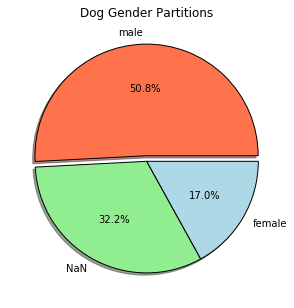

In [255]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the Pie Chart partitioned by dog gender
plt.figure(figsize=(5,5))
colors = ['#ff734c','lightgreen','lightblue']
plt.pie(gendercount, labels=gendernames, autopct='%1.1f%%',shadow=True,colors=colors,radius = 1,explode=(0.05, 0, 0))
plt.title('Dog Gender Partitions')
plt.show()

> * Male Dogs appear to be the most popular amongst all the tweets, as 50% of the tweets are about male dogs.
* About 32% of the tweets did not contain any mention or tags indicating dog gender.

#### Popular Dog Breeds

In [248]:
# Filter dog_breed counts < 15 and create a new dataframe
df_dogbreed = df.loc[df['Is_Dog']==True].groupby(df.dog_breed).filter(lambda x: len(x) >= 15).reset_index(drop=True)
# get names of dog breeds
breednames = df_dogbreed['dog_breed'].value_counts().index.tolist()
# get count of dog breeds
breedcounts = df_dogbreed['dog_breed'].value_counts().values.tolist()
# Construct dataframe of dogbreed counts
df_dogbreed = pd.DataFrame({'Dog_Breed': breednames,'Count': breedcounts})
df_dogbreed

,Count,Dog_Breed
0,138,golden_retriever
1,95,Labrador_retriever
2,88,Pembroke
3,79,Chihuahua
4,54,pug
5,41,chow
6,40,Samoyed
7,38,Pomeranian
8,38,toy_poodle
9,29,malamute


In [249]:
hover_bar = HoverTool(tooltips=[("Count Value", "@right")])
p = figure(y_range=breednames,height = 400,sizing_mode="scale_width",title="Histogram of Dog Breeds",toolbar_location="above")
p.hbar(y=breednames, height=0.5, left=0, right=breedcounts, color="limegreen")
p.add_tools(hover_bar)
p.xaxis.axis_label = "Count"
show(p)

In [250]:
df[cols].loc[df['Is_Dog']==True].groupby(df['dog_breed']).agg(['mean','median'])

retweet_count         favorite_count           \
                                        mean  median           mean   median   
dog_breed                                                                      
Afghan_hound                    5815.000000   5173.0  16988.666667   16968.0   
Airedale                        1355.250000   961.0   5182.333333    2969.5    
American_Staffordshire_terrier  2146.923077   1648.0  7416.769231    5808.0    
Appenzeller                     1421.000000   1421.0  7213.500000    7213.5    
Australian_terrier              3000.000000   3000.0  10933.500000   10933.5   
Bedlington_terrier              2789.800000   2485.0  12808.000000   13650.0   
Bernese_mountain_dog            1561.600000   1421.0  6677.700000    4908.0    
Blenheim_spaniel                2518.100000   982.5   9119.800000    3554.0    
Border_collie                   2153.333333   1212.5  8772.500000    4048.0    
Border_terrier                  3295.428571   2292.0  13358.285714   13224.0   
Boston_bull                     1670.333333   871.0   6085.222222    2861.0    
Brabancon_griffon               281.333333    270.0   867.666667     972.0     
Brittany_spaniel                1458.428571   654.0   5790.142857    2619.0    
Cardigan                        4421.823529   2744.0  15039.000000   10412.0   
Chesapeake_Bay_retriever        2770.565217   1779.0  10401.826087   5650.0    
Chihuahua                       2800.265823   924.0   8644.113924    2854.0    
Dandie_Dinmont                  1006.666667   857.0   3379.666667    2876.0    
Doberman                        1754.750000   1536.5  8337.125000    7425.0    
English_setter                  1465.571429   716.0   4759.000000    1631.0    
English_springer                5838.777778   573.0   15406.777778   2186.0    
EntleBucher                     685.000000    685.0   2631.000000    2631.0    
Eskimo_dog                      4643.277778   1367.0  11774.944444   5311.0    
French_bulldog                  4735.192308   2683.5  18384.576923   10229.5   
German_shepherd                 2586.450000   1837.0  9974.800000    7014.5    
German_short-haired_pointer     1425.142857   702.0   6388.142857    2542.0    
Gordon_setter                   2427.500000   973.0   5423.000000    4064.5    
Great_Dane                      1770.555556   1300.0  6148.111111    4396.0    
Great_Pyrenees                  4597.285714   1991.5  12684.071429   6827.0    
Greater_Swiss_Mountain_dog      2141.333333   1663.0  10344.666667   7585.0    
Ibizan_hound                    421.000000    308.0   1091.666667    779.0     
...                                     ...      ...           ...      ...    
cocker_spaniel                  3628.000000   1999.0  11490.555556   8325.0    
collie                          2203.900000   940.0   7207.300000    3576.5    
curly-coated_retriever          1179.000000   512.0   4519.333333    1790.0    
dalmatian                       1693.000000   1352.5  5087.833333    4944.5    
flat-coated_retriever           4413.875000   2826.5  16523.625000   14821.0   
giant_schnauzer                 3723.666667   1182.0  12198.666667   2638.0    
golden_retriever                3575.202899   2223.0  12183.101449   7990.0    
groenendael                     407.000000    407.0   1857.000000    1857.0    
keeshond                        1685.500000   1436.0  4823.000000    4689.5    
kelpie                          2409.363636   2391.0  9808.090909    9349.0    
komondor                        2028.333333   2034.0  9796.666667    7890.0    
kuvasz                          1707.625000   1672.0  5726.875000    5042.0    
malamute                        2511.137931   2120.0  8653.172414    6892.0    
malinois                        1179.444444   1284.0  4054.555556    2979.0    
miniature_pinscher              2377.772727   1507.0  8572.727273    3945.0    
miniature_poodle                948.500000    835.5   3396.500000    2362.5    
miniature_schnauzer            

> The most popular dog breeds appear to *Golden Retriever* and *Labrador Retriever*.